# Text mining and basic language comparison - solutions

The goal of this project is to analyse the first chapter of the Emile Zola's book, *L'assommoir* in five different languages. This project uses most of the concept that were shown during the python introduction and some guidance is provided if external knowledge is required. The data can be found at `../data/LAssommoir_*txt` for the five studied languages.

In [1]:
from collections import Counter
from collections import OrderedDict

## Read input file and get a list of individual sentence

Given the text file which are provided, some tips are given in order to have a good start.

 1. all file must be openned with `open(filename, 'r', encoding='utf8')` command (with the `encoding` option)
 2. the caracter `\xa0` will have to be replaced by white space in all the text: `line.replace('\xa0',' ')`
 3. the most common caracter to define sentence is `.` but not only: `['.', '…', '...', '?', '¿', '!']` should be taken as possible separators
 
All these step will be done one by one in order to get a list of clean sentence to be studied.
 
**1. Write a function which returns the whole text as a single python string.**

In [2]:
def get_text(filename):
    '''
    Return a single string containing the text of the file 'filename'
    '''
    text = ''
    f = open(filename, 'r', encoding='utf8')
    for l in f:
        text += l.strip().replace('\xa0',' ')
    return text

In [3]:
# test the function an print the first 1000 caracters
text = get_text('../data/LAssommoir_fr.txt')
print(text[0:1000])

Gervaise avait attendu Lantier jusqu’à deux heures du matin. Puis, toute frissonnante d’être restée en camisole à l’air vif de la fenêtre, elle s’était assoupie, jetée en travers du lit, fiévreuse, les joues trempées de larmes. Depuis huit jours, au sortir du Veau à deux têtes, où ils mangeaient, il l’envoyait se coucher avec les enfants et ne reparaissait que tard dans la nuit, en racontant qu’il cherchait du travail. Ce soir-là, pendant qu’elle guettait son retour, elle croyait l’avoir vu entrer au bal du Grand-Balcon, dont les dix fenêtres flambantes éclairaient d’une nappe d’incendie la coulée noire des boulevards extérieurs ; et, derrière lui, elle avait aperçu la petite Adèle, une brunisseuse qui dînait à leur restaurant, marchant à cinq ou six pas, les mains ballantes, comme si elle venait de lui quitter le bras pour ne pas passer ensemble sous la clarté crue des globes de la porte.Quand Gervaise s’éveilla, vers cinq heures, raidie, les reins brisés, elle éclata en sanglots. Lan

**2. Write a function which takes the precedent string and return a list of sentences.**

In [4]:
def get_sentences(text):
    
    # Get the sentences separated by ., ..., ?, !
    seps = ['.', '…', '...', '?', '¿', '!']
    sentences = [text]
    for sep in seps:
        s, sentences = sentences, []
        for seq in s:
            sentences += seq.split(sep)
    
    # Return
    return sentences

In [5]:
# test the function an print the 5 first sentences
sentences = get_sentences(text)
for i, s in enumerate(sentences[0:5]):
    print(i, s)

0 Gervaise avait attendu Lantier jusqu’à deux heures du matin
1  Puis, toute frissonnante d’être restée en camisole à l’air vif de la fenêtre, elle s’était assoupie, jetée en travers du lit, fiévreuse, les joues trempées de larmes
2  Depuis huit jours, au sortir du Veau à deux têtes, où ils mangeaient, il l’envoyait se coucher avec les enfants et ne reparaissait que tard dans la nuit, en racontant qu’il cherchait du travail
3  Ce soir-là, pendant qu’elle guettait son retour, elle croyait l’avoir vu entrer au bal du Grand-Balcon, dont les dix fenêtres flambantes éclairaient d’une nappe d’incendie la coulée noire des boulevards extérieurs ; et, derrière lui, elle avait aperçu la petite Adèle, une brunisseuse qui dînait à leur restaurant, marchant à cinq ou six pas, les mains ballantes, comme si elle venait de lui quitter le bras pour ne pas passer ensemble sous la clarté crue des globes de la porte
4 Quand Gervaise s’éveilla, vers cinq heures, raidie, les reins brisés, elle éclata en san

**3. Keep only sentences without `\n` and which are not only a ponctuation symbol.**

To indroduce the problem with the french text, print `sentences[40:45]`, what do you notice?

In [6]:
print(sentences[40:45])

[' le bourgeois n’est pas sage, n’est-ce pas ', ' ', ' Ne vous désolez pas, madame Lantier', ' Il s’occupe beaucoup de politique ; l’autre jour, quand on a voté pour Eugène Sue, un bon, paraît-il, il était comme un fou', ' Peut-être bien qu’il a passé la nuit avec des amis à dire du mal de cette crapule de Bonaparte']


The ponctuation signs which appear in practice are listed below:
```python
symbols = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
           '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
```

Sentences which are only one of these signs have to be disregarded. One can use `str.strip()` function to make sure all special caracters at the begining/end of a line are removed.

In [7]:
def clean_sentences(sentences):
    symbols = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
               '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
    return [s.strip() for s in sentences if s and s not in symbols]  

In [8]:
# Test for the 40th to 45th sentences
sentences = clean_sentences(sentences)
print(sentences[40:45])

['le bourgeois n’est pas sage, n’est-ce pas', 'Ne vous désolez pas, madame Lantier', 'Il s’occupe beaucoup de politique ; l’autre jour, quand on a voté pour Eugène Sue, un bon, paraît-il, il était comme un fou', 'Peut-être bien qu’il a passé la nuit avec des amis à dire du mal de cette crapule de Bonaparte', '— Non, non, murmura-t-elle avec effort, ce n’est pas ce que vous croyez']


## Extract a list of words and a list of letters

**4. Write a function which takes the list of clean sentences and return a list of words.**

As before, the main separator of words is the white space, but it is not the only one. We provide a list of caracters which might appear, and which can be changed into white space, so that at the end all words are separated by a white space:
```python
to_be_space = ['…', '...', '?', '!', ';', ',', '-', '—', '–', 
               '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
```

Since we will later perform some statistics on words, we want to be case-insensitive. There is a function to convert any string into a lower case string: `string.casefold()`.

In [9]:
def get_words_from_sentences(sentences):
    to_be_space = ['…', '...', '?', '!', ';', ',', '-', '—', '–', 
                   '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
    all_words = ' '.join(sentences)
    for symbol in to_be_space:
        all_words = all_words.replace(symbol, ' ')
    all_words = all_words.split(' ')
    all_words = [w.casefold() for w in all_words if w]
    return all_words

In [10]:
# Test the function and print the 10 first words
words = get_words_from_sentences(sentences)
for i, w in enumerate(words[0:10]):
    print(i, w)

0 gervaise
1 avait
2 attendu
3 lantier
4 jusqu
5 à
6 deux
7 heures
8 du
9 matin


**5. Write a function which takes the list of clean sentences and return a list of individual letters.**

Wha we call letter is every symbols (including accents, etc ...) but:

```python
to_disgard = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
              '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
```

One might be careful that we also want to be case-insensitive for letters as well.

In [11]:
def get_letters_from_sentences(sentences):
    to_disgard = [' ', '…', '...', '?', '!', ';', ',', '-', '—', '–', '“', '”', '¿',
                  '"', '\'', '’', '(', ')', '›', '‹', '»', '«']
    all_letters = ''.join(sentences)
    all_letters = [l.casefold() for l in all_letters if l and l not in to_disgard]
    return all_letters

In [12]:
# test the finction and print the 50 first letters
letters = get_letters_from_sentences(sentences)
print(letters[0:50])

['g', 'e', 'r', 'v', 'a', 'i', 's', 'e', 'a', 'v', 'a', 'i', 't', 'a', 't', 't', 'e', 'n', 'd', 'u', 'l', 'a', 'n', 't', 'i', 'e', 'r', 'j', 'u', 's', 'q', 'u', 'à', 'd', 'e', 'u', 'x', 'h', 'e', 'u', 'r', 'e', 's', 'd', 'u', 'm', 'a', 't', 'i', 'n']


## Counting sentences, words and letters ...

**6. Write a function which return a list of integer corresponding to the number of words per sentences**

In [13]:
def count_words_per_sentences(sentences):
    words = [s.split(' ') for s in sentences]
    return [len(w) for w in words]

In [14]:
# Test the function and print the Nwords for the 10 first sentences
Nwords = count_words_per_sentences(sentences)
for n, s in zip(Nwords[:5], sentences[:5]):
    print('\n' , n, s)


 9 Gervaise avait attendu Lantier jusqu’à deux heures du matin

 27 Puis, toute frissonnante d’être restée en camisole à l’air vif de la fenêtre, elle s’était assoupie, jetée en travers du lit, fiévreuse, les joues trempées de larmes

 34 Depuis huit jours, au sortir du Veau à deux têtes, où ils mangeaient, il l’envoyait se coucher avec les enfants et ne reparaissait que tard dans la nuit, en racontant qu’il cherchait du travail

 80 Ce soir-là, pendant qu’elle guettait son retour, elle croyait l’avoir vu entrer au bal du Grand-Balcon, dont les dix fenêtres flambantes éclairaient d’une nappe d’incendie la coulée noire des boulevards extérieurs ; et, derrière lui, elle avait aperçu la petite Adèle, une brunisseuse qui dînait à leur restaurant, marchant à cinq ou six pas, les mains ballantes, comme si elle venait de lui quitter le bras pour ne pas passer ensemble sous la clarté crue des globes de la porte

 14 Quand Gervaise s’éveilla, vers cinq heures, raidie, les reins brisés, elle éc

**7. In the same way count the number of letters per words**

In [15]:
def count_letters_per_words(words):
    return [len(w) for w in words]

In [16]:
# Test the function and print the Nletters for the 10 first words
Nletters = count_letters_per_words(words)
for n, w in zip(Nletters[:5], words[:5]):
    print('\n' , n, w)


 8 gervaise

 5 avait

 7 attendu

 7 lantier

 5 jusqu


**8. Extract the occurence frequency of a given letter or words using `Counter()` function**

The function `Counter()` is part of the module `collections` - which is imported at the begining of the notebook - and return the number of occurence of each element of a list:

In [17]:
l = [1, 2, 3, 1, 3, 1]
counts = Counter(l)
print(counts)

Counter({1: 3, 3: 2, 2: 1})


It can be convenient to convert this object into a dictionnary, since we can sort dictionnary by key or value, thanks to the object `OrderedDict` from `collections` module (we remind you that dictionnary are natively not ordered). We provide the function to sort a dictionnary with decreasing values.

In [18]:
counts = dict(counts)
sorted_counts = OrderedDict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
print('Unsorted: {}'.format(counts))
print('Sorted  : {}'.format(sorted_counts))

Unsorted: {1: 3, 2: 1, 3: 2}
Sorted  : OrderedDict([(1, 3), (3, 2), (2, 1)])


Write two functions which return an ordered dictionnary containing `letter:frequency` and `word:frequency`.

In [19]:
def count_letters_frequency(letters):
    Ntot = len(letters)
    counters = dict(Counter(letters))
    ordered_counts = OrderedDict(sorted(counters.items(), key=lambda x: x[1], reverse=True))
    return {k:float(v/Ntot) for k, v in ordered_counts.items()}


def count_words_frequency(words):
    Ntot = len(words)
    counters = dict(Counter(words))
    ordered_counts = OrderedDict(sorted(counters.items(), key=lambda x: x[1], reverse=True))
    return {k:v/Ntot for k, v in ordered_counts.items()}

In [20]:
# Test the letter function
letter_freq = count_letters_frequency(letters)

# Print the 5 mostly used letters
letter, freq = list(letter_freq.keys()), list(letter_freq.values())
for l, f in zip(letter[:5], freq[:5]):
    print('{}: {:.0f}%'.format(l, f*100))

e: 15%
a: 9%
s: 8%
t: 7%
i: 7%


In [21]:
# Test the word function
words_freq = count_words_frequency(words)

# Print the 5 mostly used letters
word, freq = list(words_freq.keys()), list(words_freq.values())
for w, f in zip(word[:5], freq[:5]):
    print('{}: {:.0f}%'.format(w, f*100))

de: 4%
la: 3%
elle: 2%
les: 2%
le: 2%


## Explore language comparison

### Wrap up several functions into a single loading fonction

**9. Write a function which perform all the operations above and return a dictionnary with all the raw information needed to perform some statistics.**

We need to to store the list of sentences, the list of words and the list of letters. These three lists allows to call the different function designed before. We propose to store this information into a dictionnary `data`.

In [22]:
def get_clean_sentences(fname):
    t = get_text(fname)
    s = get_sentences(t)
    return clean_sentences(s)
    
def get_text_data(fname):
    data = {}
    data['sentences'] = get_clean_sentences(fname)
    data['words'] = get_words_from_sentences(data['sentences'])
    data['letters'] = get_letters_from_sentences(data['sentences'])
    return data 

In [23]:
# Loading the dictionnary for french text and printing basic numbers
data_fr = get_text_data('../data/LAssommoir_fr.txt')
print(len(data_fr['sentences']), len(data_fr['words']), len(data_fr['letters']))

803 10969 47475


Now, everything is ready to load the five languages and compare their caracteristics using simple statistics:
  + average sentence/word length
  + which letters are the most used?
  + which letters are used is some language and not others?
  + which are the most common words in each language?

In [24]:
data_fr = get_text_data('../data/LAssommoir_fr.txt')
data_en = get_text_data('../data/LAssommoir_en.txt')
data_de = get_text_data('../data/LAssommoir_de.txt')
data_it = get_text_data('../data/LAssommoir_it.txt')
data_es = get_text_data('../data/LAssommoir_es.txt')

In [25]:
all_data = [data_fr, data_en, data_de, data_it, data_es]
all_name = ['FR', 'EN', 'DE', 'IT', 'ES']

# Example of averaged sentence length
for n, d in zip(all_name, all_data):
    nw = count_words_per_sentences(d['sentences'])
    nw = sum(nw)/len(nw)
    print('{}: {:.2f} words/sentence'.format(n, nw))

FR: 12.91 words/sentence
EN: 12.86 words/sentence
DE: 13.26 words/sentence
IT: 11.93 words/sentence
ES: 13.05 words/sentence


## To go further: more variables and plots

One other intersting variable is the number of unique words as function of the total number of words. Indeed, this allows to probe the basic amount of word duplication. The way to compute it to perform the same counting on a subset of words which increase for each element of the list:

In [26]:
# Count the number of unique words as function ot total words
def count_cumulative_words(words):
    Ntot = len(words)
    return [len(Counter(words[:i])) for i in range(0, len(words))]

# Add this information to a dictionnary
def add_cumul_words(data):
    data['cumul_words'] = count_cumulative_words(data['words'])
    return

# Add to all data we have so far
for d in all_data:
    add_cumul_words(d)

This part is showing what we can do with `matplotlib`, which is one of the most standard library for plotting in python:

In [27]:
import matplotlib.pyplot as plt

The default style can be tuned using a cosmetic parameters dictionnary, as follow:

In [28]:
# Plot settings
import matplotlib as mpl
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['axes.linewidth'] = 1.0

The following function takes in argument a list of `[name, data]` and compare few distributions of interst for all the data which are passed. This used sub plot feature of matplolib, as well as three types of graphical representation: `hist` (histogram) and `plot` (x *v.s.* y) and `bar` (y *v.s.* label).

In [29]:
def plot_text_data(*args):
    '''
    *arg is a list of [name, data] for each language.
    '''
    
    # Prepare the canvas to plot the results
    plt.figure(figsize=(23, 15))
    grid = plt.GridSpec(2, 3, wspace=0.3, hspace=0.2)
    ax1 = plt.subplot(grid[0, 0])
    ax2 = plt.subplot(grid[0, 1])
    ax3 = plt.subplot(grid[1, :3])
    ax4 = plt.subplot(grid[0, 2])
    
    # plot style
    hist_style = {'density': True, 'histtype': 'step', 'alpha': 0.3, 'linewidth': 5}
    plot_style = {'alpha': 0.3, 'linewidth': 5}
    
    for data in args:
    
        # Unpack text data
        name, text_data = data
        sentences = text_data['sentences']
        words = text_data['words']
        letters = text_data['letters']
        cumul_words = text_data['cumul_words']
        
        # Compute few basic stat
        Nwords = count_words_per_sentences(sentences)
        Nletters = count_letters_per_words(words)
        freq_letters = count_letters_frequency(letters)
    
        # plot sentence length
        ax1.hist(Nwords, bins=range(1, 80, 4), label=name + ' ({})'.format(len(sentences)), **hist_style)
        ax1.set_xlabel('Number of words per sentence')
        ax1.legend()
    
        # plot word length
        ax2.hist(Nletters, bins=range(1, 26), label=name + ' ({})'.format(len(words)), **hist_style)
        ax2.set_xlabel('Number of letters per word')
        ax2.legend()
    
        # plot letter apparition frequency
        x, y = list(freq_letters.keys()), list(freq_letters.values())    
        ax3.bar(x, y, alpha=0.3, label=name)
        ax3.legend()
        
        # plot cumulative number of words
        ax4.plot(cumul_words, label=name, **plot_style)
        ax4.set_xlabel('Number of words')
        ax4.set_ylabel('Number of unique words')
        ax4.legend()

    return

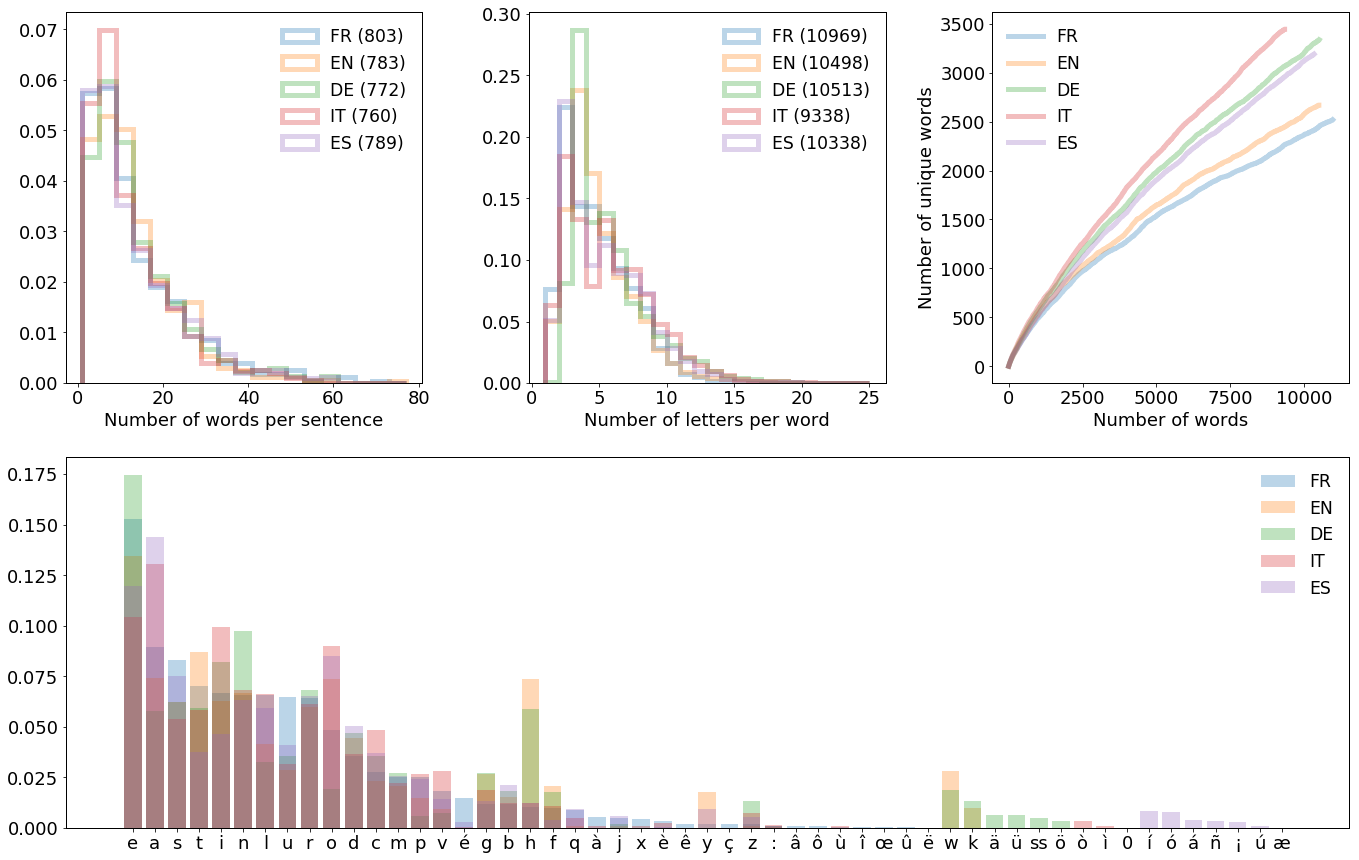

In [30]:
# Plot all
all_name_data = [[n, d] for n, d in zip(all_name, all_data)]
plot_text_data(*all_name_data)

This last part compare the 50 most commonly used words in the 5 languages, ranked by decreasing order of occurence. A variation of `bar` style is used - with horizontal bars: `barh`.

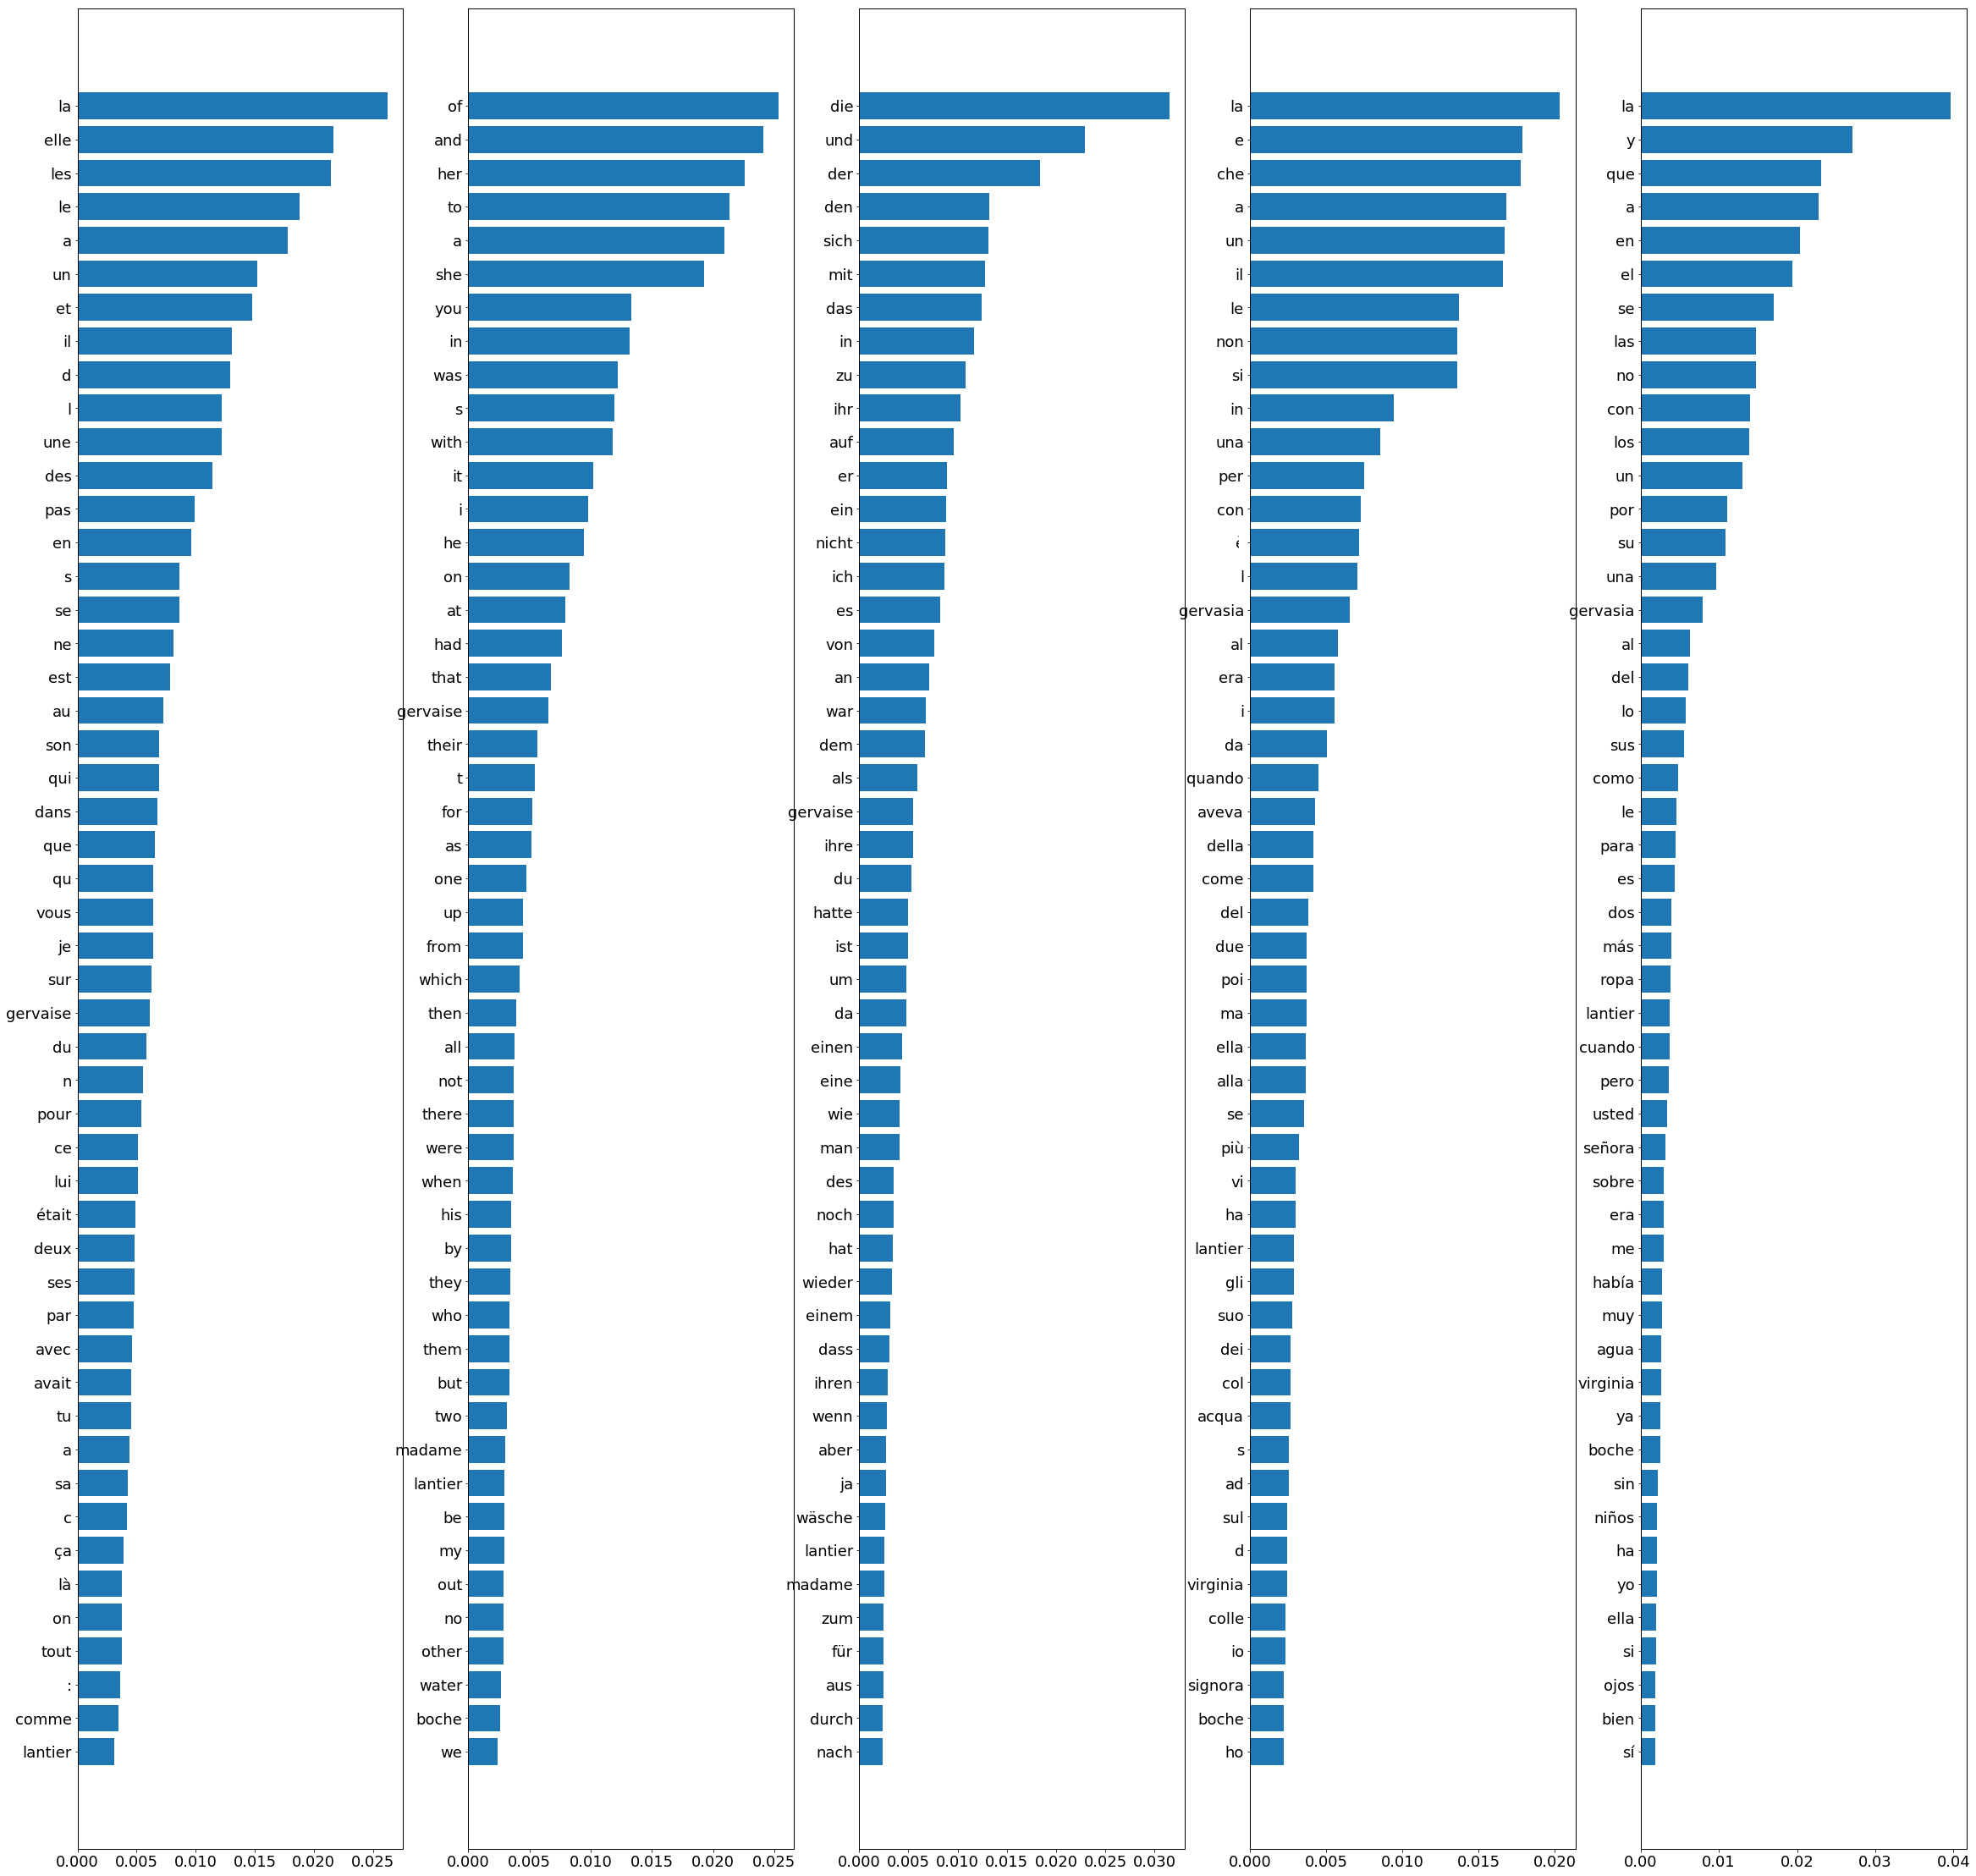

In [31]:
# Figure and subplots
fig, axs = plt.subplots(figsize=(40, 40), nrows=1, ncols=len(all_data))

# Loop over axis and data
for ax, block in zip(axs, all_name_data):
    name, data = block
    frequency = count_words_frequency(data['words'])
    x, y = list(frequency.keys()), list(frequency.values())
    ax.barh(x[50:0:-1], y[50:0:-1]);